<a href="https://colab.research.google.com/github/DebadityaShome/Deep-learning-practice/blob/main/Keras/CNN_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture

## Install dependencies
!pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"debadityashome","key":"915e65ea6a2b6e18230ba82b18a51e97"}'}

In [4]:
%%capture
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

In [5]:
!unzip "train.zip" -d "dogs-vs-cats"

Streaming output truncated to the last 5000 lines.
  inflating: dogs-vs-cats/train/dog.5499.jpg  
  inflating: dogs-vs-cats/train/dog.55.jpg  
  inflating: dogs-vs-cats/train/dog.550.jpg  
  inflating: dogs-vs-cats/train/dog.5500.jpg  
  inflating: dogs-vs-cats/train/dog.5501.jpg  
  inflating: dogs-vs-cats/train/dog.5502.jpg  
  inflating: dogs-vs-cats/train/dog.5503.jpg  
  inflating: dogs-vs-cats/train/dog.5504.jpg  
  inflating: dogs-vs-cats/train/dog.5505.jpg  
  inflating: dogs-vs-cats/train/dog.5506.jpg  
  inflating: dogs-vs-cats/train/dog.5507.jpg  
  inflating: dogs-vs-cats/train/dog.5508.jpg  
  inflating: dogs-vs-cats/train/dog.5509.jpg  
  inflating: dogs-vs-cats/train/dog.551.jpg  
  inflating: dogs-vs-cats/train/dog.5510.jpg  
  inflating: dogs-vs-cats/train/dog.5511.jpg  
  inflating: dogs-vs-cats/train/dog.5512.jpg  
  inflating: dogs-vs-cats/train/dog.5513.jpg  
  inflating: dogs-vs-cats/train/dog.5514.jpg  
  inflating: dogs-vs-cats/train/dog.5515.jpg  
  inflating: 

In [6]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [7]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Number of GPUs available:  1


In [8]:
# Organize data into train, valid, test dirs
os.chdir("dogs-vs-cats/train")
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat')

    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    
    for c in random.sample(glob.glob("cat*"), 100):
        shutil.move(c, 'valid/cat')
    
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')

    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')
os.chdir('../')

In [9]:
train_path = 'train/train/'
valid_path = 'train/valid/'
test_path = 'train/test/'

In [10]:
os.listdir()

['train']

In [11]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [12]:
imgs, labels = next(train_batches)

In [13]:
def plotImages(images_arr):
    """
    This function plots images in a form of a grid with 1 row and 10 columns
    """
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

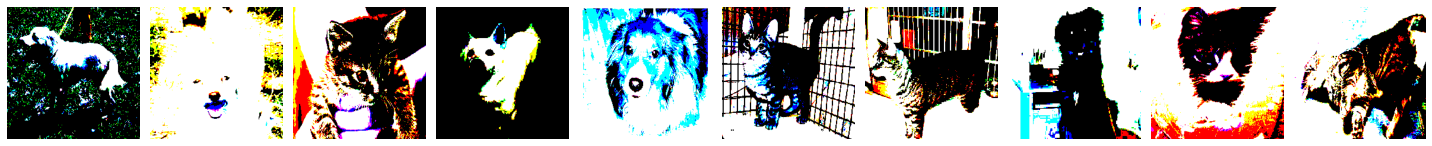

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [14]:
plotImages(imgs)
print(labels)

In [16]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [18]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 20s - loss: 17.1186 - accuracy: 0.5460 - val_loss: 3.8319 - val_accuracy: 0.5350
Epoch 2/10
100/100 - 4s - loss: 1.5227 - accuracy: 0.7730 - val_loss: 2.7748 - val_accuracy: 0.6000
Epoch 3/10
100/100 - 4s - loss: 0.3849 - accuracy: 0.9100 - val_loss: 2.9468 - val_accuracy: 0.6200
Epoch 4/10
100/100 - 4s - loss: 0.0742 - accuracy: 0.9700 - val_loss: 2.4889 - val_accuracy: 0.5600
Epoch 5/10
100/100 - 4s - loss: 0.0725 - accuracy: 0.9720 - val_loss: 2.5901 - val_accuracy: 0.5500
Epoch 6/10
100/100 - 4s - loss: 0.0439 - accuracy: 0.9850 - val_loss: 2.4129 - val_accuracy: 0.6100
Epoch 7/10
100/100 - 4s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 2.3428 - val_accuracy: 0.6250
Epoch 8/10
100/100 - 4s - loss: 7.6867e-04 - accuracy: 1.0000 - val_loss: 2.3056 - val_accuracy: 0.6100
Epoch 9/10
100/100 - 4s - loss: 5.3340e-04 - accuracy: 1.0000 - val_loss: 2.3138 - val_accuracy: 0.6150
Epoch 10/10
100/100 - 4s - loss: 4.4098e-04 - accuracy: 1.0000 - val_loss: 2.3185 - val_ac

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

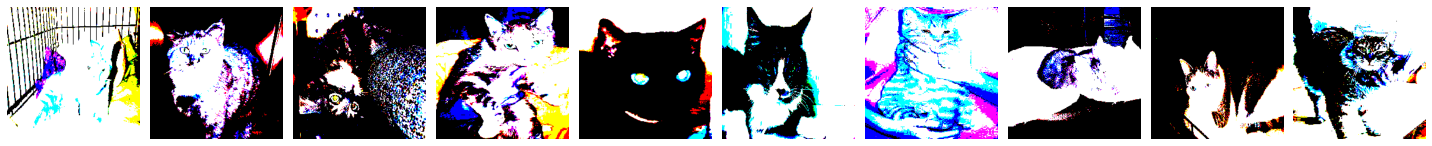

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [20]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [21]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [22]:
predictions = model.predict(x=test_batches, verbose=0)

In [24]:
np.round(predictions[:5])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [25]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [26]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

In [27]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[31 19]
 [16 34]]


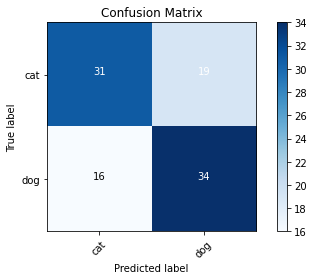

In [28]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### **Building Fine-tuned VGG16 model**

In [30]:
# Download model
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 4s 0us/step


In [31]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [32]:
type(vgg16_model)  ## This is from the KERAS functional API and not from sequential API

tensorflow.python.keras.engine.functional.Functional

In [35]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [37]:
count_params(model)

{'non_trainable_params': 0.0, 'trainable_params': 134260544}

In [39]:
## Freezing VGG16 layers
for layer in model.layers:
    layer.trainable = False

In [40]:
model.add(Dense(units=2, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [42]:
count_params(model)

{'non_trainable_params': 134260544, 'trainable_params': 8194}

### Train the VGG16 model (Fine-tuning)

In [43]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 7s - loss: 0.3623 - accuracy: 0.8500 - val_loss: 0.1359 - val_accuracy: 0.9500
Epoch 2/5
100/100 - 5s - loss: 0.0988 - accuracy: 0.9620 - val_loss: 0.0888 - val_accuracy: 0.9600
Epoch 3/5
100/100 - 5s - loss: 0.0596 - accuracy: 0.9740 - val_loss: 0.0766 - val_accuracy: 0.9600
Epoch 4/5
100/100 - 5s - loss: 0.0417 - accuracy: 0.9910 - val_loss: 0.0708 - val_accuracy: 0.9700
Epoch 5/5
100/100 - 5s - loss: 0.0308 - accuracy: 0.9950 - val_loss: 0.0647 - val_accuracy: 0.9700


In [47]:
assert model.history.history.get('accuracy')[-1] > 0.95

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

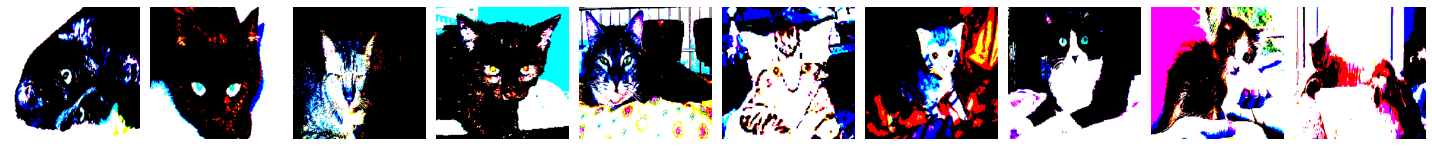

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [49]:
# Predicting using fine-tuned VGG16 model
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [50]:
predictions = model.predict(x=test_batches, verbose=0)

In [51]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [53]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [54]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[50  0]
 [ 2 48]]


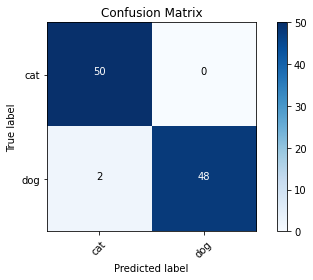

In [55]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')